In [ ]:
# Toffoli

In [1]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
import networkx as nx

In [5]:
# matrix representation of toffoli gate
U = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])


#@qml.qnode(dev)
#def U_actual():
#    qml.QubitUnitary(U,wires=[0,1,2])
#    return qml.state()
q=qml.QubitUnitary(U,wires=[0,1,2])
print(U)


[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


In [3]:
dev = qml.device("default.qubit.autograd", wires=3)


#@qml.qnode(dev)
def ansatz(params):
    l=params*0.5
    
    qml.CNOT(wires=[0,1])
    qml.RZ(l[0],wires=1)
    qml.CNOT(wires=[0,1])

    # circuit for local ham H=I⊗Z⊗Z
    qml.CNOT(wires=[1,2])
    qml.RZ(l[1],wires=2)
    qml.CNOT(wires=[1,2])
    
    
   
    # single qubit gates
    
    # circuit for local ham H=I⊗I⊗Z+I⊗I⊗X+I⊗I⊗Y
    
    qml.Hadamard(wires=2)
    qml.RZ(l[2],wires=2)
    qml.Hadamard(wires=2)
    
    # circuit for local ham H=I⊗Z⊗I+I⊗X⊗I+I⊗Y⊗I
    #qml.Identity(wires=0) 
    qml.RZ(l[3],wires=1)
   
    # circuit for local ham H=Z⊗I⊗I+X⊗I⊗I+Y⊗I⊗I
    qml.RZ(l[4],wires=0)
  
    #H=I⊗Z⊗ X
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[1,2])
    qml.RZ(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=2)
    
    
    # circuit for local ham H=Z⊗I⊗X
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[0,2])
    qml.RZ(l[6],wires=2)
    qml.CNOT(wires=[0,2])
    qml.Hadamard(wires=2)
    
    # circuit for local ham H=Z⊗I⊗X
    qml.CNOT(wires=[0,2])
    qml.RZ(l[7],wires=2)
    qml.CNOT(wires=[0,2])
    
    # important: more 2 qubit interations to be added....   

    '''
    # circuit for local ham H=I⊗X⊗X
    [qml.Hadamard(wires=i) for i in range(1,3)]
    qml.CNOT(wires=[1,2])
    qml.RZ(l[8],wires=2)
    qml.CNOT(wires=[1,2])
    [qml.Hadamard(wires=i) for i in range(1,3)]

    # circuit for local ham H=X⊗X⊗I  
    [qml.Hadamard(wires=i) for i in range(0,2)]
    qml.CNOT(wires=[0,1])
    qml.RZ(l[9],wires=1)
    qml.CNOT(wires=[0,1])
    [qml.Hadamard(wires=i) for i in range(0,2)]
 
    # circuit for local ham H=Y⊗Y⊗I  
    [qml.RX(np.pi/2,wires=i) for i in range(0,1)]
    qml.CNOT(wires=[0,1])
    qml.RZ(l[10],wires=1)
    qml.CNOT(wires=[0,1])
    [qml.RX(-np.pi/2,wires=i) for i in range(0,1)]

    # circuit for local ham H=I⊗Y⊗Y
    [qml.RX(np.pi/2,wires=i) for i in range(1,3)]
    qml.CNOT(wires=[1,2])
    qml.RZ(l[11],wires=2)
    qml.CNOT(wires=[1,2])
    [qml.RX(-np.pi/2,wires=i) for i in range(1,3)]

    qml.RZ(l[12],wires=2)


    qml.RX(l[13],wires=1)
    
    qml.RY(l[14],wires=1)
 
    qml.RX(l[15],wires=0)
    
    qml.RY(l[16],wires=0)
    #H=Z⊗ X ⊗ I
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0,1])
    qml.RZ(l[17],wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=1)

    #H=X⊗Z⊗ I
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.RZ(l[18],wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    
    #H=I⊗X⊗ Z
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1,2])
    qml.RZ(l[19],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=1)
    
      #H=I⊗X⊗ y
    qml.Hadamard(wires=1)
    qml.RX(np.pi/2,wires=2)
    qml.CNOT(wires=[1,2])
    qml.RZ(2*l[20],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=1)
    qml.RX(-np.pi/2,wires=2)
    
    #H=X⊗ y⊗I
    qml.Hadamard(wires=0)
    qml.RX(np.pi/2,wires=1)
    qml.CNOT(wires=[0,1])
    qml.RZ(2*l[21],wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    qml.RX(-np.pi/2,wires=1)
    '''


In [4]:
# ZGR ansatz
def ansatz2(l):
    qml.RY(l[0],wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(l[1],wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(l[2],wires=1)
    qml.CNOT(wires=[0,2])
    qml.RY(l[3],wires=2)
    qml.CNOT(wires=[1,2])
    qml.RY(l[4],wires=2)
    qml.CNOT(wires=[0,2])
    qml.RY(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    qml.RY(l[6],wires=2)

In [6]:
@qml.qnode(dev, diff_method="backprop")

def circuit(params, state, apply_inv=True):
    qml.BasisState(np.array(state), wires=[0,1,2])
    ansatz(params[:8])
    ansatz(params[:8])
    ansatz(params[:8])
    ansatz(params[:8])
    ansatz(params[:8])
    ansatz(params[:8])
    #ansatz(params[8:])
    #ansatz2(params[:7])

    
    #if apply_inv:
    #    qml.QubitUnitary(U,wires=[0,1,2]).inv()
    return qml.state()

@qml.qnode(dev, diff_method="backprop")
def target_st(state):
    qml.BasisState(np.array(state), wires=[0,1,2])
    qml.QubitUnitary(U,wires=[0,1,2]).inv() # fredkin gate
    return qml.state()

In [7]:
params = np.random.random(8)
Id = np.eye(8, requires_grad=False)
state_vector=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
print(Id[7])
print(state_vector[7])

[0. 0. 0. 0. 0. 0. 0. 1.]
[1 1 1]


In [8]:
circuit(params,[0,0,1])

tensor([0.38790286-0.0383826j , 0.13226074+0.91135352j,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ], requires_grad=True)

In [452]:
def cost_state(params, i):
    state=state_vector[i]
    return np.sum(np.abs(circuit(params, state) - Id[i]))

def cost(params):
    return sum(cost_state(params, i) for i in range(6,8)) #+sum(cost_state(params, i) for i in range(0,2))+sum(cost_state(params, i) for i in range(2,6))

In [453]:
def cost1(params):
    return cost_state(params, 0)+cost_state(params, 6)+cost_state(params, 7)

In [460]:
opt = qml.AdagradOptimizer(stepsize=0.01)

for i in range(300+1):
    params = opt.step(cost, params)

    if i % 30 == 0:
        print(f"Cost at step {i}:", cost(params))

Cost at step 0: 0.01406775699993971
Cost at step 30: 0.013370146286333484
Cost at step 60: 0.0019407888257370282
Cost at step 90: 0.001515086959364616
Cost at step 120: 0.0007452386137281041
Cost at step 150: 0.0006431420365367673
Cost at step 180: 0.0005562653591113957
Cost at step 210: 0.0005015383979973039
Cost at step 240: 0.0004569921944857217
Cost at step 270: 0.00042592017432167823
Cost at step 300: 0.0003979398381004074


In [45]:
sum(cost_state(params, i) for i in range(8))

tensor(4.02214465, requires_grad=True)

In [461]:
abs(circuit(params, [1,1,1],apply_inv=False))

tensor([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.36371709e-10], requires_grad=True)

In [10]:
def cost3(params):
    circ_ket=[]
    act_ket=[]
    overlaps=[] 
    
    for i in range(8):
        state=state_vector[i]
        circ_ket.append(circuit(params,state))
        act_ket.append(target_st(state))

        overlaps.append((np.sum(np.dot(np.conj(circ_ket[i]),act_ket[i]))))
    #mean_overlap = tf.reduce_mean(overlaps)
    
    #cost = tf.abs(tf.reduce_sum(overlaps ))
    cost=0
    for i in range(8):
        cost+=(np.abs(overlaps[i]))**2
    cost_abs=1-(cost)/len(overlaps)   
    return cost_abs#, overlaps

In [11]:
opt = qml.AdagradOptimizer(stepsize=0.2)
cost_arr=[]
params_arr=[]
for i in range(500+1):
    params = opt.step(cost3, params)

    if i % 50 == 0:
        print(f"Cost at step {i}:", cost3(params))
        cost_arr.append(cost3(params))
        params_arr.append(params)

Cost at step 0: 0.19439480073839865
Cost at step 50: 0.000212817571167645
Cost at step 100: 2.5297589525963282e-05
Cost at step 150: 5.122209829622193e-06
Cost at step 200: 1.2498784581760347e-06
Cost at step 250: 3.3133811250252165e-07
Cost at step 300: 9.146942248072776e-08
Cost at step 350: 2.5780290568988562e-08
Cost at step 400: 7.345412278425556e-09
Cost at step 450: 2.1049633147640634e-09
Cost at step 500: 6.050739909113645e-10


In [24]:
params # the optimized parameters from the above optimization

tensor([ 0.1754152 ,  0.91757479,  0.52360169,  0.57444234,  0.507611  ,
         1.04731146,  0.5234848 , -0.91757136], requires_grad=True)

In [25]:
cost3(params)

6.050739909113645e-10

In [12]:
def get_unitary(params):
    return np.array([circuit(params, state, apply_inv=False) for state in state_vector]).T

In [23]:
print("\nOptimized unitary using Hamiltonian:\n", abs(get_unitary(params)))
print("\nThe corresponding optimized parameters:\n",params)
print("\nOptimized unitary size:\n", get_unitary(params).shape)
print("\nActual Toffoli:\n", U)


Optimized unitary using Hamiltonian:
 [[1.00000000e+00 4.26494744e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.26494744e-06 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.99999999e-01 4.81511271e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.81511271e-05 9.99999999e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 7.29857809e-06 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.29857809e-06 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.50245057e-06 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000

In [28]:
cost_arr

[0.19439480073839865,
 0.000212817571167645,
 2.5297589525963282e-05,
 5.122209829622193e-06,
 1.2498784581760347e-06,
 3.3133811250252165e-07,
 9.146942248072776e-08,
 2.5780290568988562e-08,
 7.345412278425556e-09,
 2.1049633147640634e-09,
 6.050739909113645e-10]

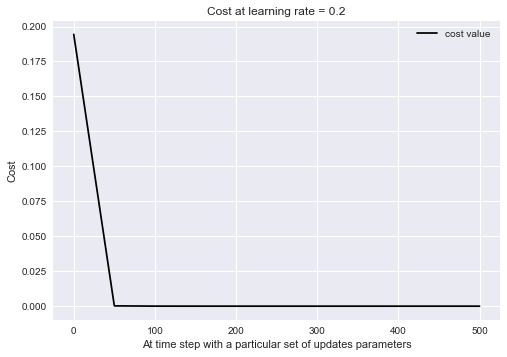

In [29]:
x=np.linspace(0,500,11)
y=cost_arr
plt.plot(x,y,"black",label="cost value")
plt.title("Cost at learning rate = 0.2")
plt.ylabel("Cost")
plt.xlabel("At time step with a particular set of updates parameters")
plt.legend()
plt.show()

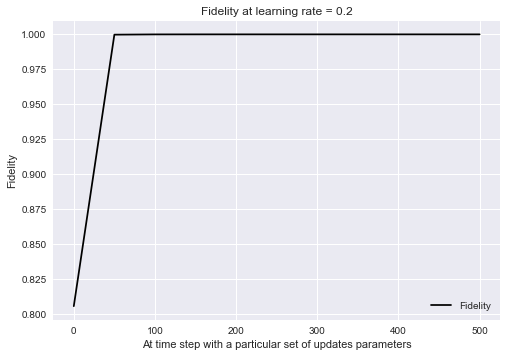

In [30]:
fidelity=[]
for elements in cost_arr:
    fidelity.append(1-elements)
    
fidelity
x=np.linspace(0,500,11)
y=fidelity
plt.plot(x,y,"black",label="Fidelity")
plt.title("Fidelity at learning rate = 0.2")
plt.ylabel("Fidelity")
plt.xlabel("At time step with a particular set of updates parameters")
plt.legend()
plt.show()

In [31]:
params_arr # this array is used in the below plot where each plot represents evolution of each parameter from the below araays

[tensor([ 0.1754152 ,  1.12972245,  0.63062912,  0.57444234,  0.507611  ,
          1.03120149,  0.32843269, -0.13739166], requires_grad=True),
 tensor([ 0.1754152 ,  0.88564475,  0.52563164,  0.57444234,  0.507611  ,
          1.10056411,  0.47017007, -0.88213837], requires_grad=True),
 tensor([ 0.1754152 ,  0.90517974,  0.52423698,  0.57444234,  0.507611  ,
          1.06832863,  0.50245041, -0.90430151], requires_grad=True),
 tensor([ 0.1754152 ,  0.91177815,  0.52387602,  0.57444234,  0.507611  ,
          1.05720027,  0.51358891, -0.91142656], requires_grad=True),
 tensor([ 0.1754152 ,  0.91468555,  0.5237335 ,  0.57444234,  0.507611  ,
          1.05225427,  0.51853867, -0.914521  ], requires_grad=True),
 tensor([ 0.1754152 ,  0.91610399,  0.52366758,  0.57444234,  0.507611  ,
          1.04983119,  0.52096343, -0.91602153], requires_grad=True),
 tensor([ 0.1754152 ,  0.91682931,  0.52363477,  0.57444234,  0.507611  ,
          1.04858952,  0.52220592, -0.91678659], requires_grad

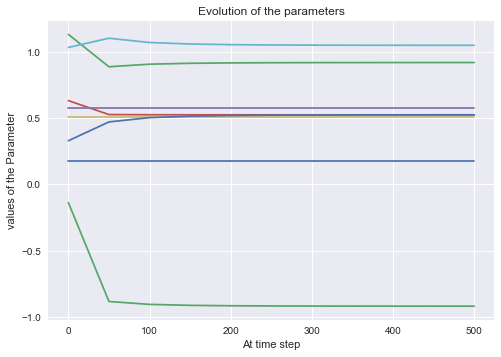

In [32]:
x=np.linspace(0,500,11)
y=params_arr
plt.plot(x,y)
plt.ylabel("values of the Parameter")
plt.xlabel("At time step")
plt.title("Evolution of the parameters")
plt.legend()
plt.show()

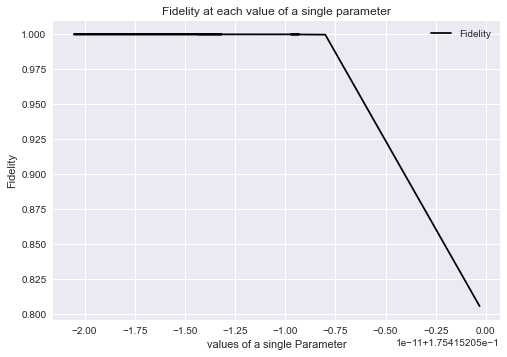

In [33]:
single_param=[]
for i in range(11):
    single_param.append(params_arr[i][0])
x=single_param
y=fidelity
plt.plot(x,y,"black",label="Fidelity")
plt.xlabel("values of a single Parameter")
plt.ylabel("Fidelity")
plt.title("Fidelity at each value of a single parameter")
plt.legend()
plt.show()

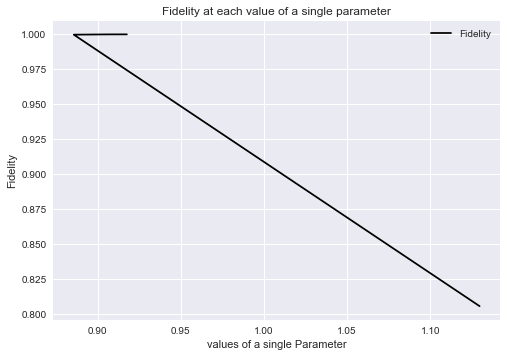

In [34]:
single_param=[]
for i in range(11):
    single_param.append(params_arr[i][1])
x=single_param
y=fidelity
plt.plot(x,y,"black",label="Fidelity")
plt.xlabel("values of a single Parameter")
plt.ylabel("Fidelity")
plt.title("Fidelity at each value of a single parameter")
plt.legend()
plt.show()

In [117]:
print("\nOptimized unitary using ZGR:\n", abs(get_unitary(params)))
print("\nOptimized unitary size:\n", get_unitary(params).shape)
print("\nActual Toffoli:\n", U)


Optimized unitary using ZGR:
 [[9.99999325e-01 8.13558661e-04 5.15088815e-04 4.19055249e-07
  6.49847882e-04 5.28689730e-07 3.34729601e-07 2.72322350e-10]
 [8.13558661e-04 9.99999325e-01 4.19055249e-07 5.15088815e-04
  5.28689730e-07 6.49847882e-04 2.72322350e-10 3.34729601e-07]
 [5.15088680e-04 5.60403287e-07 9.99999064e-01 1.08797336e-03
  3.34729514e-07 3.64177135e-10 6.49847713e-04 7.07017662e-07]
 [5.60403287e-07 5.15088680e-04 1.08797336e-03 9.99999064e-01
  3.64177135e-10 3.34729514e-07 7.07017662e-07 6.49847713e-04]
 [6.49846696e-04 1.18456669e-06 7.27690819e-07 1.32646408e-09
  9.99997501e-01 1.82283565e-03 1.11978564e-03 2.04119029e-06]
 [1.18456669e-06 6.49846696e-04 1.32646408e-09 7.27690819e-07
  1.82283565e-03 9.99997501e-01 2.04119029e-06 1.11978564e-03]
 [1.79610950e-09 7.27689811e-07 1.60397218e-06 6.49845797e-04
  2.76389035e-06 1.11978409e-03 2.46822547e-03 9.99996116e-01]
 [7.27689811e-07 1.79610950e-09 6.49845797e-04 1.60397218e-06
  1.11978409e-03 2.76389035e-06 

In [14]:
@qml.qnode(dev, diff_method="backprop")

def circuit2(params, state, apply_inv=True):
    qml.BasisState(np.array(state), wires=[0,1,2])
    ansatz(params[:8])
    ansatz(params[:8])
    ansatz(params[:8])
    ansatz(params[:8])
    ansatz(params[:8])
    ansatz(params[:8])
    #ansatz(params[8:])
    #qml.QubitUnitary(U,wires=[0,1,2]).inv()
    return qml.probs(wires=[0,1,2])

Input state [0 0 0]


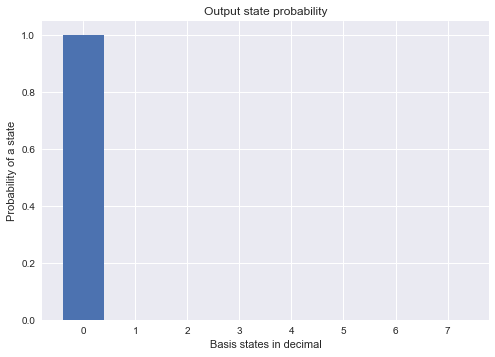

In [46]:
probs=circuit2(params,state_vector[0])
print("Input state",state_vector[0])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()
#  best optimization using current optimized parameters

Input state [0 0 1]


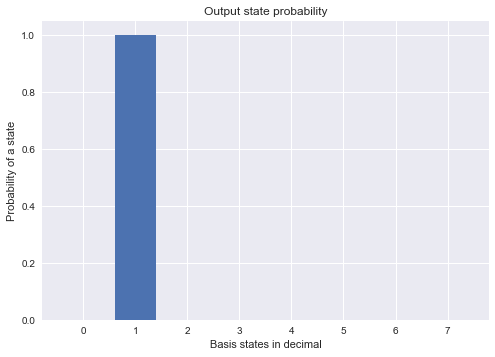

In [47]:
probs=circuit2(params,state_vector[1])
print("Input state",state_vector[1])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()

Input state [0 0 1]


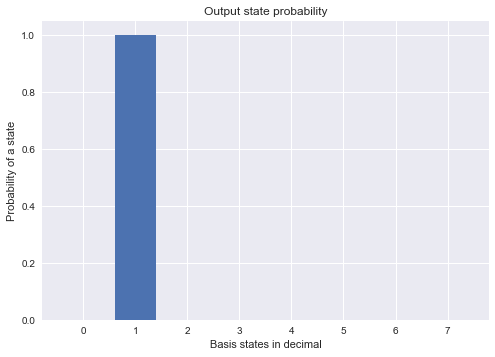

In [48]:
probs=circuit2(params,state_vector[1])
print("Input state",state_vector[1])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()

Input state [0 1 0]


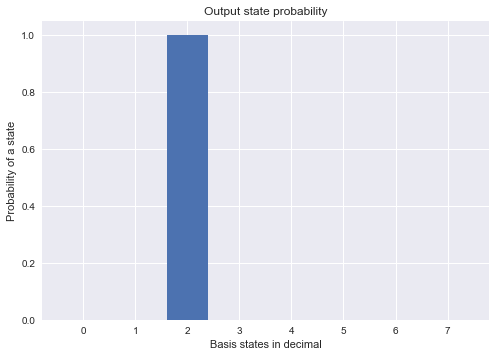

In [49]:
probs=circuit2(params,state_vector[2])
print("Input state",state_vector[2])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()

Input state [0 1 1]


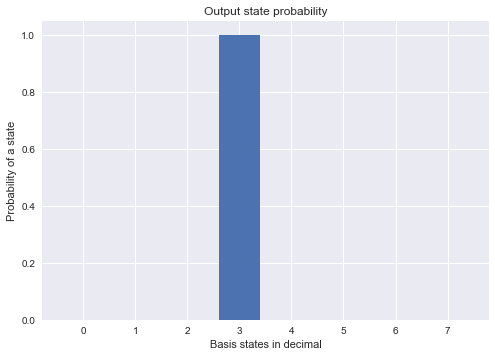

In [50]:
probs=circuit2(params,state_vector[3])
print("Input state",state_vector[3])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()

Input state [1 0 0]


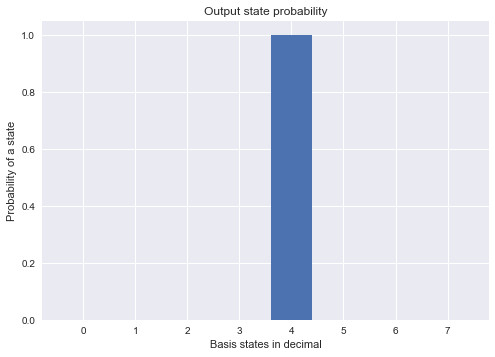

In [51]:
probs=circuit2(params,state_vector[4])
print("Input state",state_vector[4])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()

Input state [1 0 1]


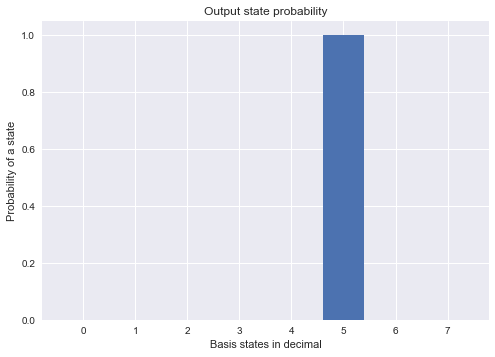

In [52]:
probs=circuit2(params,state_vector[5])
print("Input state",state_vector[5])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()

Input state [1 1 0]


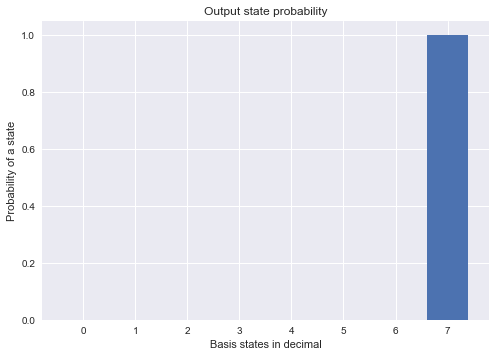

In [53]:
probs=circuit2(params,state_vector[6])
print("Input state",state_vector[6])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()

Input state [1 1 1]


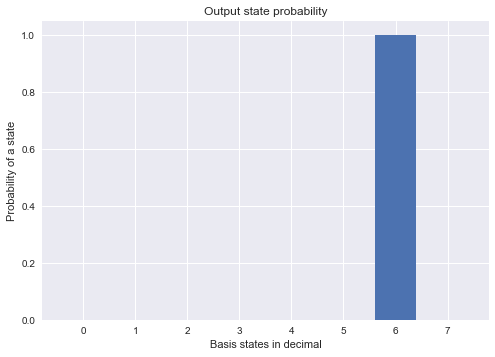

In [54]:
probs=circuit2(params,state_vector[7])
print("Input state",state_vector[7])
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.xlabel("Basis states in decimal")
plt.ylabel("Probability of a state")
plt.title("Output state probability")
plt.show()

In [116]:
abs(circuit2(params,[1,1,0]))

tensor([1.65036533e-13, 2.16801397e-19, 6.77487086e-07, 1.31335674e-12,
        4.73256630e-08, 5.94104358e-15, 4.98709374e-01, 5.01289901e-01], requires_grad=True)

In [55]:
params

tensor([ 0.1754152 ,  0.91757479,  0.52360169,  0.57444234,  0.507611  ,
         1.04731146,  0.5234848 , -0.91757136], requires_grad=True)

In [56]:
circuit.draw()

' 0: ──╭|1⟩──╭C──────────────╭C───RZ(0.254)──────────────────────────────────────────────────────────────────────╭C─────────────╭C─────╭C──────────────╭C──╭C──────────────╭C───RZ(0.254)──────────────────────────────────────────────────────────────────────╭C─────────────╭C─────╭C──────────────╭C──╭C──────────────╭C───RZ(0.254)──────────────────────────────────────────────────────────────────────╭C─────────────╭C─────╭C──────────────╭C──╭C──────────────╭C───RZ(0.254)──────────────────────────────────────────────────────────────────────╭C─────────────╭C─────╭C──────────────╭C──╭C──────────────╭C───RZ(0.254)──────────────────────────────────────────────────────────────────────╭C─────────────╭C─────╭C──────────────╭C──╭C──────────────╭C───RZ(0.254)──────────────────────────────────────────────────────────────────────╭C─────────────╭C─────╭C──────────────╭C──╭┤ State \n 1: ──├|1⟩──╰X──RZ(0.0877)──╰X──╭C─────────────────────╭C──RZ(0.287)───────────────────╭C─────────────╭C────────│───────────